# **Decision Tree Classifier**

In [2]:
# Step 1: Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Step 2: Load dataset
df = pd.read_csv("/content/titanic.csv")

In [3]:
# Step 3: Select features and target
X = df[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]]
y = df["Survived"]

In [13]:
# Step 4: Handle categorical values
le_sex = LabelEncoder()
le_embarked = LabelEncoder()

X["Sex"] = le_sex.fit_transform(X["Sex"])
X["Embarked"] = le_embarked.fit_transform(X["Embarked"])

/tmp/ipython-input-1026296110.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Sex"] = le_sex.fit_transform(X["Sex"])
/tmp/ipython-input-1026296110.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Embarked"] = le_embarked.fit_transform(X["Embarked"])


In [14]:
# Step 5: Handle missing values (fill with mean or mode)
X["Age"] = X["Age"].fillna(X["Age"].mean())
X["Embarked"] = X["Embarked"].fillna(X["Embarked"].mode()[0])

/tmp/ipython-input-371038989.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Age"] = X["Age"].fillna(X["Age"].mean())
/tmp/ipython-input-371038989.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Embarked"] = X["Embarked"].fillna(X["Embarked"].mode()[0])


In [5]:
# Step 6: Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 7: Train Decision Tree Classifier
clf = DecisionTreeClassifier(criterion="entropy", max_depth=4, random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

In [6]:
# Step 8: Evaluate accuracy
accuracy = clf.score(X_test, y_test)
print("Decision Tree Accuracy:", accuracy)


Decision Tree Accuracy: 0.7988826815642458


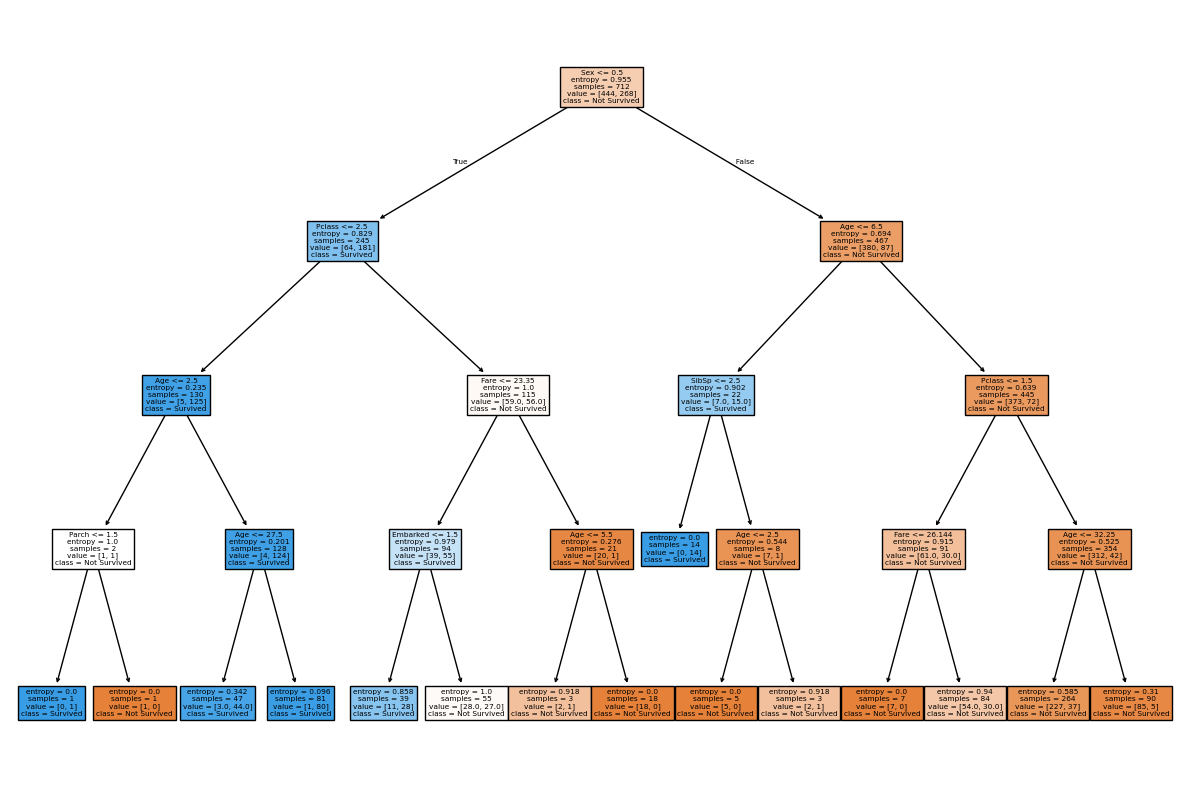

In [7]:
# Step 9: Visualize the tree
plt.figure(figsize=(15,10))
plot_tree(clf, feature_names=X.columns, class_names=["Not Survived", "Survived"], filled=True)
plt.show()

In [8]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Step 10: Make predictions
y_pred = clf.predict(X_test)

In [12]:
# Step 11: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[96  9]
 [27 47]]


In [10]:
# Step 12: Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.91      0.84       105
           1       0.84      0.64      0.72        74

    accuracy                           0.80       179
   macro avg       0.81      0.77      0.78       179
weighted avg       0.80      0.80      0.79       179

